# Зачёт. Степанов Павел ИВТ-22М. Вариант 17

In [242]:
variant = 17
print(f"Задание №{variant % 4 + 1}")

Задание №2


## Номер задания i = (N % 4) + 1 = (17 % 4) + 1 = 2
### Задача №2 «Бинаризация»
Даны два изображения: исходное и эталонное бинаризированное изображение.<br>
Разработайте процедуру бинаризации исходного изображения на основе одного из известных алгоритмов.<br>
Вычислите метрики качества бинаризации:<br>
* ошибку первого рода (ложное срабатывание);
* ошибку второго рода (пропуск сигнала).

In [243]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def plot(img, title=""):
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap="gray", vmin=0, vmax=np.max(img))


def plotHist(img, title=""):
    plt.figure()
    plt.title(title)
    plt.hist(img.flatten(), range=(0, 255), bins=255)


imgOrig = np.uint8(cv2.imread("./provided/Original.jpeg", cv2.IMREAD_GRAYSCALE))
imgBin = np.uint8(cv2.imread("./provided/Binarized.jpeg", cv2.IMREAD_GRAYSCALE))
Ierr_img = IIerr_img = np.array([])


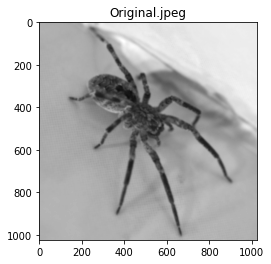

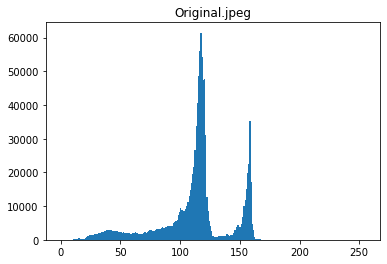

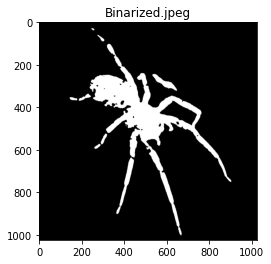

In [244]:
plot(imgOrig, "Original.jpeg")
plotHist(imgOrig, "Original.jpeg")
plot(imgBin, "Binarized.jpeg")

#### Адаптивный алгоритм бинаризации изображений.<br> Алгоритм Саувола

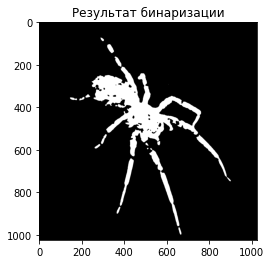

In [245]:
R = 3
rh = np.uint8(np.floor(R / 2))


def rolling_window(img_i, shape):
    s = (img_i.shape[0] - shape[0] + 1,) + (img_i.shape[1] - shape[1] + 1,) + shape
    strides = img_i.strides + img_i.strides
    return np.lib.stride_tricks.as_strided(img_i, shape=s, strides=strides)


windows = rolling_window(imgOrig, (R, R))
h = np.zeros(imgOrig.shape)
for y in range(windows.shape[0]):
    for x in range(windows.shape[1]):
        aper = windows[y][x]
        mu = np.mean(aper)
        sigma = np.std(aper)
        k = 0.5
        R_ = 128
        h = mu*(1+k*(sigma/R_-1))

img = imgOrig < h
plot(img, "Результат бинаризации")

#### Метрики качества бинаризации

In [246]:
TotalPix = imgBin.shape[0] * imgBin.shape[1]
Isig_ref = np.sum(imgBin != 0)
Isig = np.sum(img != 0)
Isig_and = np.sum(imgBin & img)
error_1 = (Isig - Isig_and) / (TotalPix - Isig_ref) * 100
print(f"Ошибка первого рода (ложное срабатывание) = {error_1} %")

error_2 = (Isig_ref - Isig_and) / Isig_ref * 100
print(f"Ошибка второго рода (пропуск сигнала) = {error_2} %")


Ошибка первого рода (ложное срабатывание) = 0.5330095444899148 %
Ошибка второго рода (пропуск сигнала) = 31.02831620636111 %
